In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
data = pd.read_csv("CVD_cleaned.csv")

In [3]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [4]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [6]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [7]:
for i in list(data.columns):
    print("{} -- {}".format(i, data[i].value_counts().shape[0]))

General_Health -- 5
Checkup -- 5
Exercise -- 2
Heart_Disease -- 2
Skin_Cancer -- 2
Other_Cancer -- 2
Depression -- 2
Diabetes -- 4
Arthritis -- 2
Sex -- 2
Age_Category -- 13
Height_(cm) -- 99
Weight_(kg) -- 525
BMI -- 3654
Smoking_History -- 2
Alcohol_Consumption -- 31
Fruit_Consumption -- 77
Green_Vegetables_Consumption -- 75
FriedPotato_Consumption -- 69


In [8]:
categorical_list = ["General_Health", "Checkup","Exercise", "Heart_Disease", "Skin_Cancer","Other_Cancer","Depression","Diabetes", "Arthritis"
,"Sex","Age_Category","Height_(cm)","Weight_(kg)","BMI","Smoking_History","Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption"]

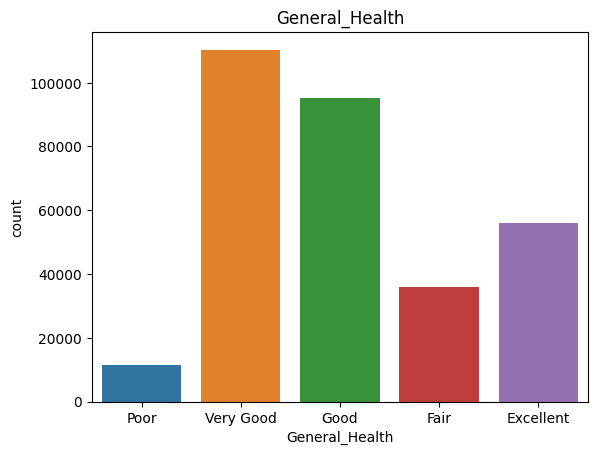

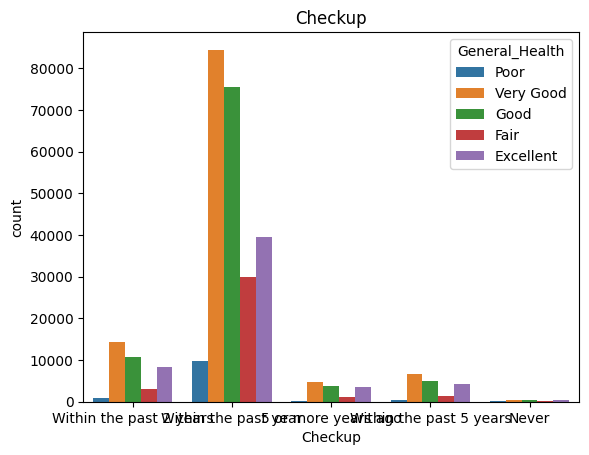

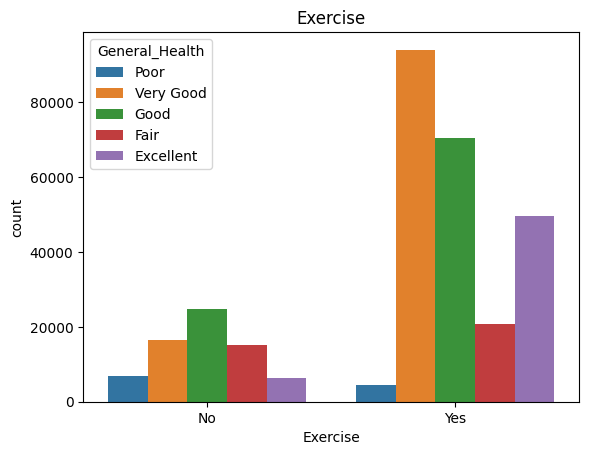

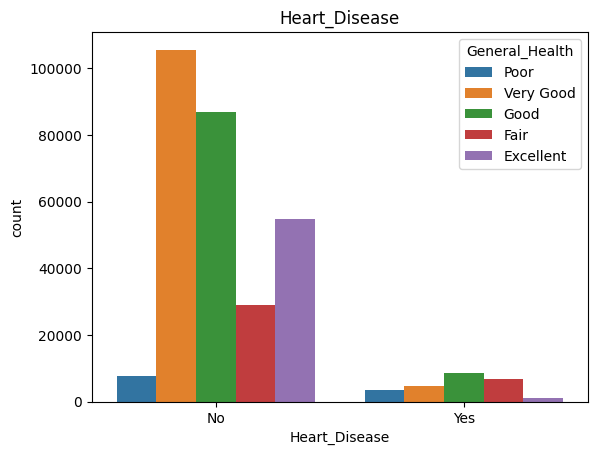

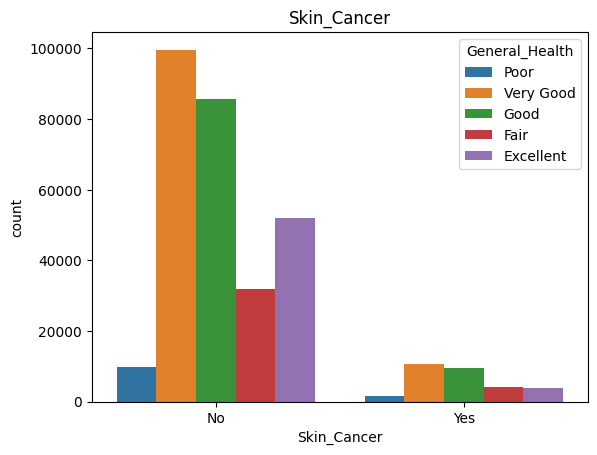

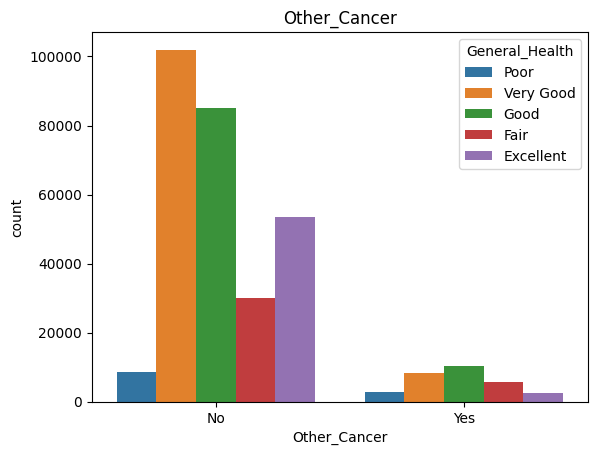

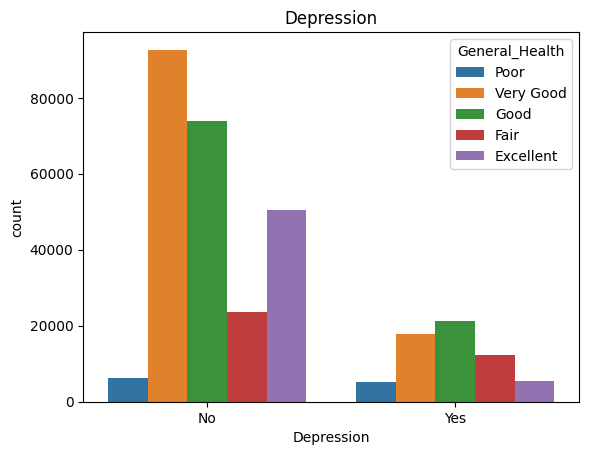

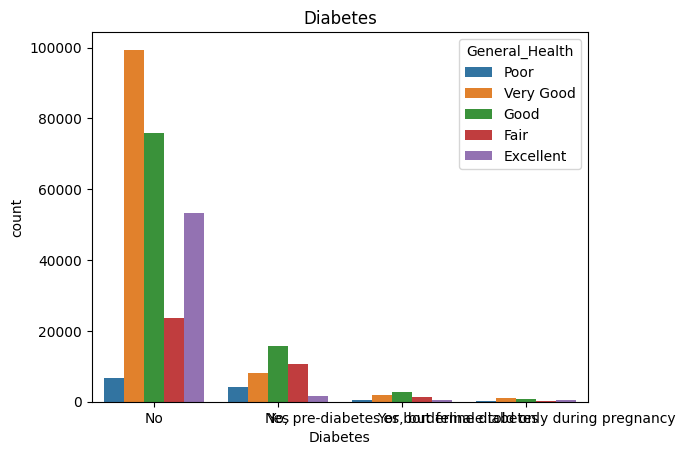

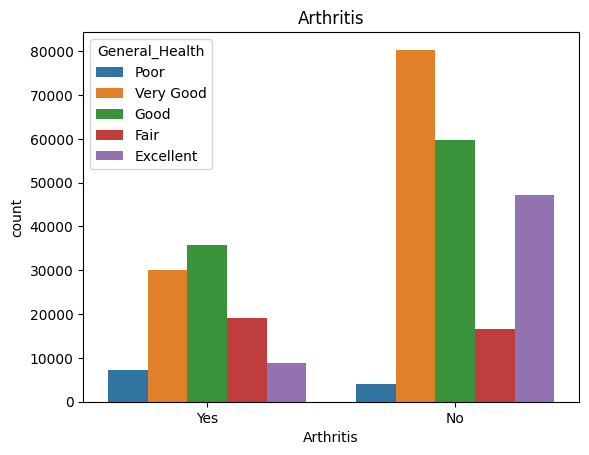

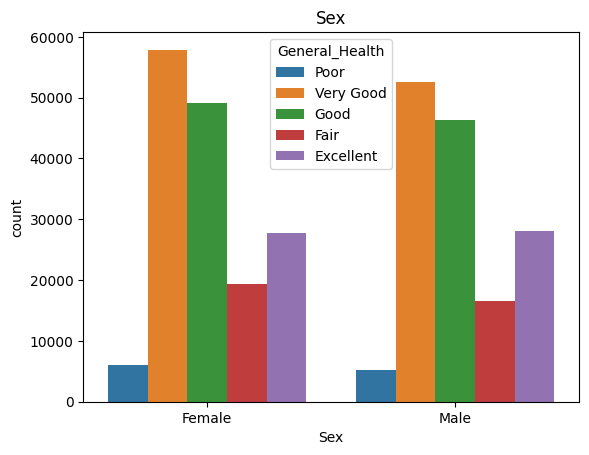

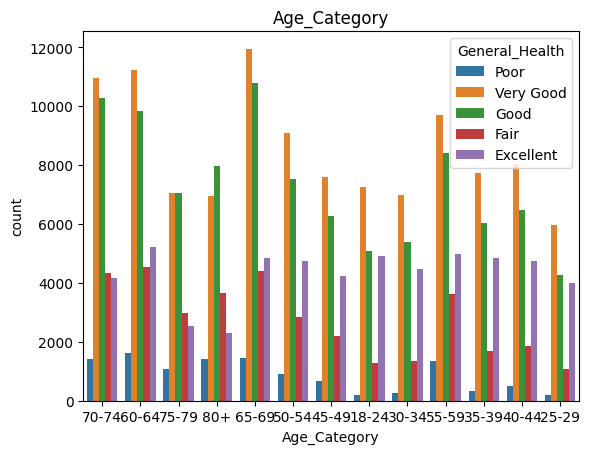

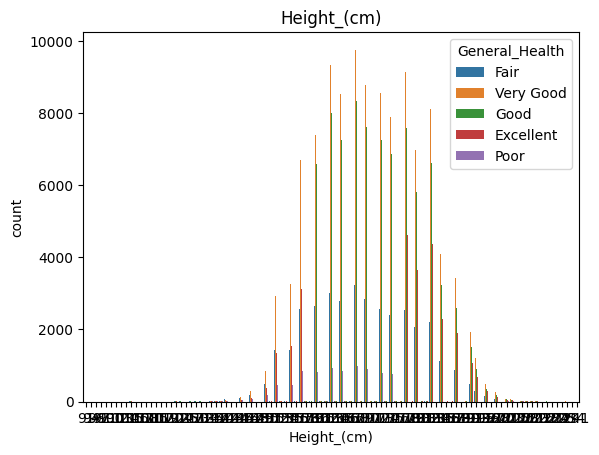

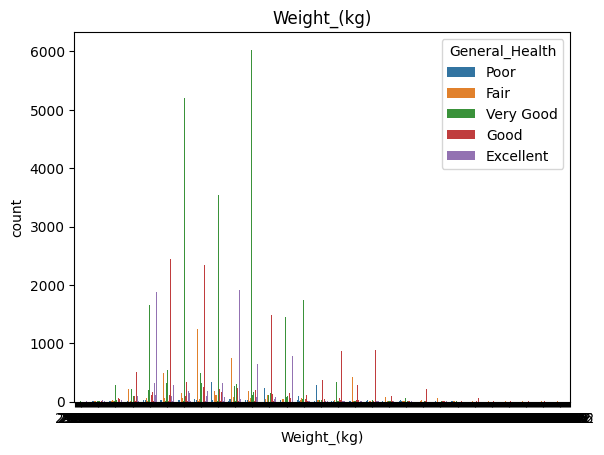

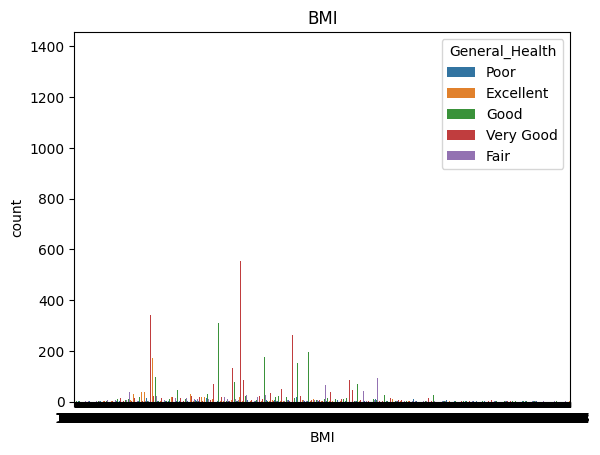

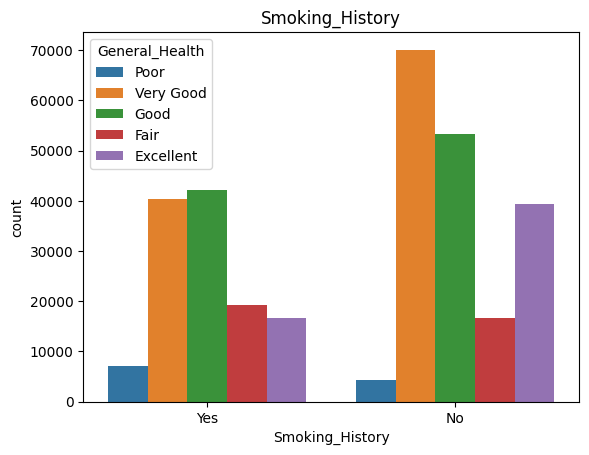

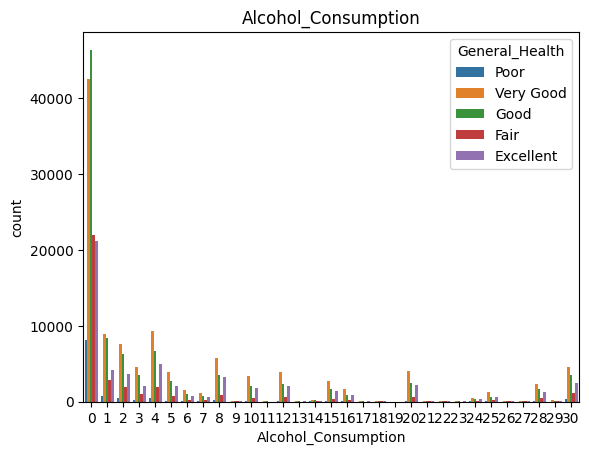

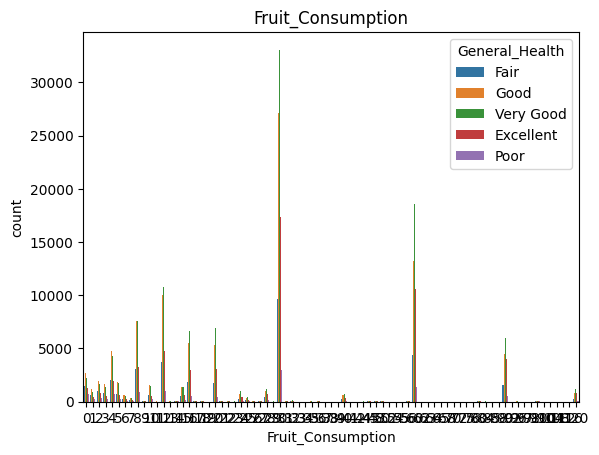

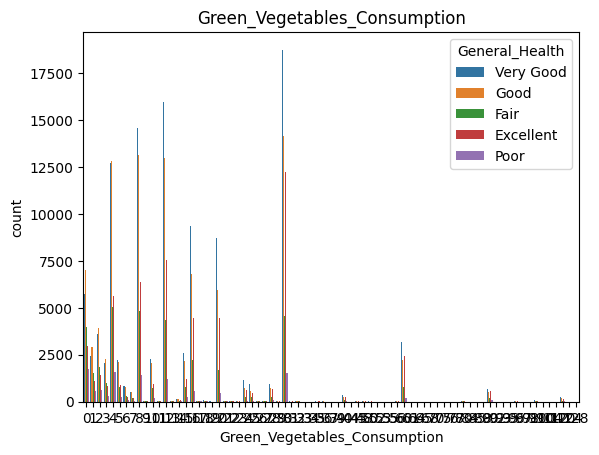

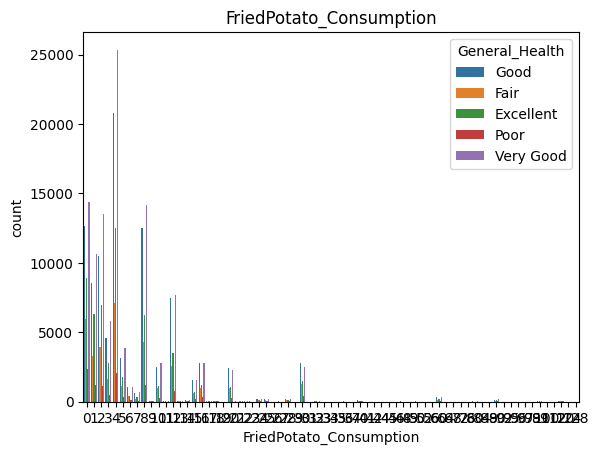

In [9]:
df_categoric = data.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "General_Health")
    plt.title(i)

In [10]:
numeric_data = data.select_dtypes(include=[float, int])

<Axes: >

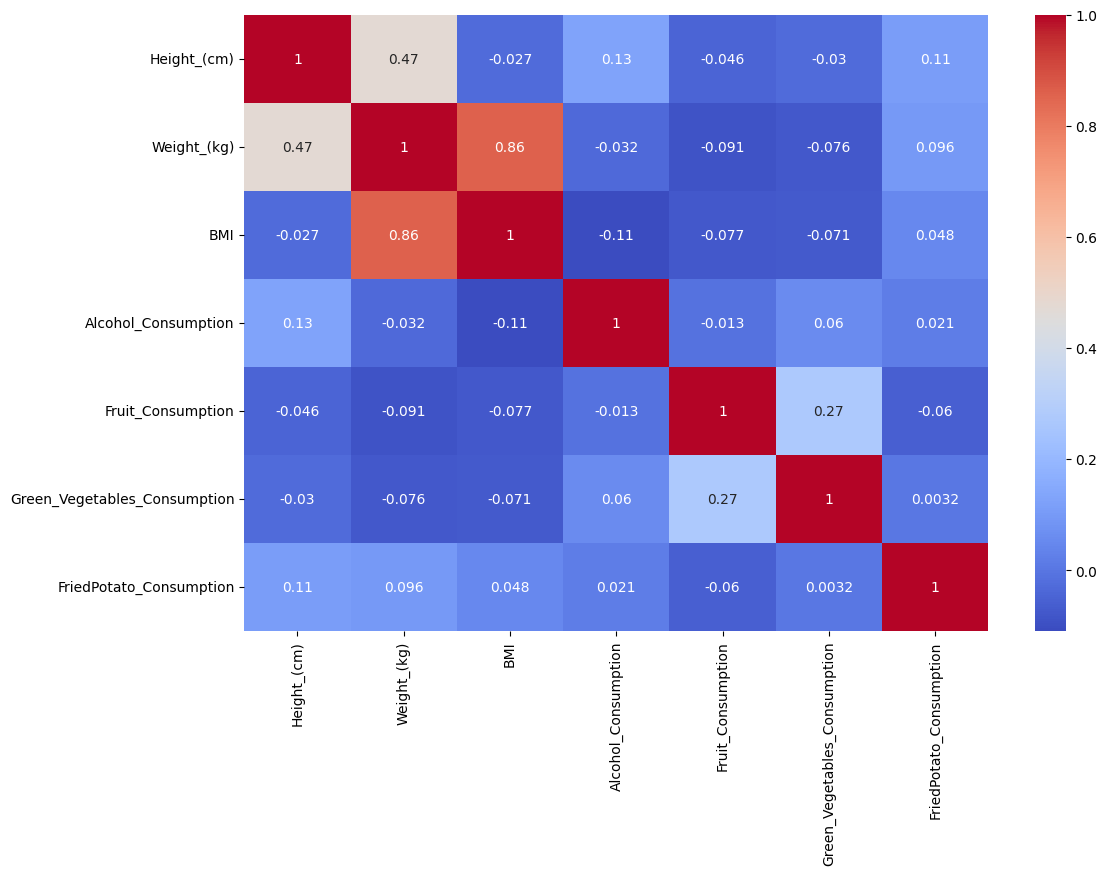

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

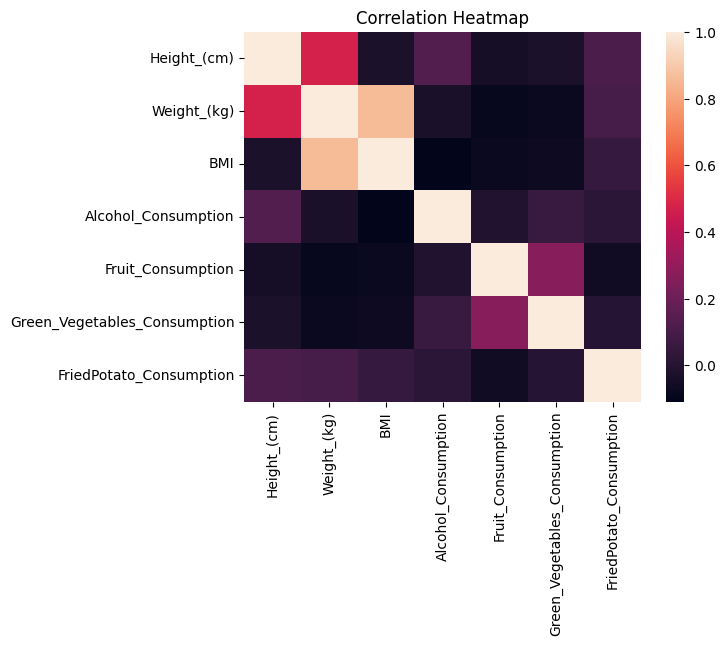

In [12]:
sns.heatmap(numeric_data.corr())
plt.title('Correlation Heatmap')
plt.show()

In [13]:
binary_columns = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History']
label_encoder = LabelEncoder()

In [14]:
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [15]:
categorical_list = ["General_Health", "Checkup","Exercise", "Heart_Disease", "Skin_Cancer","Other_Cancer","Depression","Diabetes", "Arthritis"
,"Sex","Age_Category","Height_(cm)","Weight_(kg)","BMI","Smoking_History","Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption"]

In [16]:
categorical_columns = ['General_Health', 'Checkup', 'Diabetes', 'Age_Category']
data = pd.get_dummies(data, columns=categorical_columns)

In [17]:
scaler = StandardScaler()
data[['Height_(cm)', 'Weight_(kg)', 'BMI']] = scaler.fit_transform(data[['Height_(cm)', 'Weight_(kg)', 'BMI']])


In [18]:
consumption_columns = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
data[consumption_columns] = MinMaxScaler().fit_transform(data[consumption_columns])

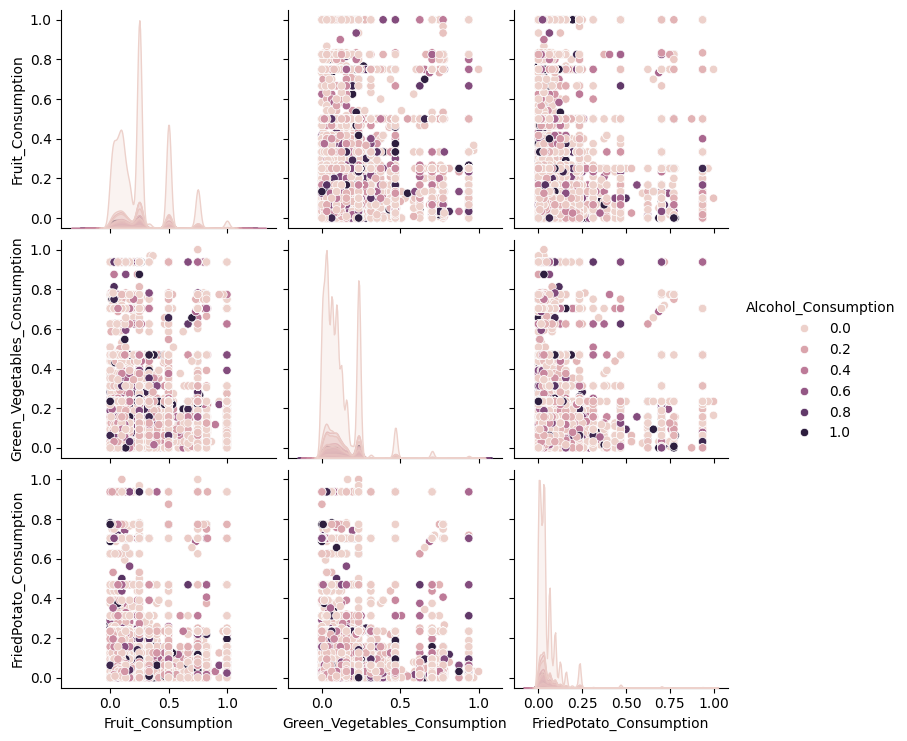

In [24]:
df_numeric = data.loc[:, consumption_columns]
sns.pairplot(df_numeric, hue = "Alcohol_Consumption", diag_kind = "kde")
plt.show()

In [19]:
data.fillna(data.mean(), inplace=True)
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


In [18]:
scaler = StandardScaler()
data[['Height_(cm)', 'Weight_(kg)', 'BMI']] = scaler.fit_transform(data[['Height_(cm)', 'Weight_(kg)', 'BMI']])


In [25]:
scaled_array = scaler.fit_transform(data[consumption_columns[:-1]])

In [26]:
scaled_array 

array([[-0.62152705,  0.00662492,  0.05959713],
       [-0.62152705,  0.00662492, -1.01234246],
       [-0.13370725, -0.71697295, -0.81135379],
       ...,
       [-0.13370725,  0.40862374, -0.47637267],
       [-0.2556622 ,  0.00662492, -0.20838777],
       [-0.4995721 , -0.99837212, -0.20838777]])

In [29]:
data.to_csv('preprocessed_dataset.csv', index=False)

print("Data preprocessing completed.")

Data preprocessing completed.


In [30]:
data = pd.read_csv('preprocessed_dataset.csv')

In [31]:
target = 'Heart_Disease'
X = data.drop(columns=[target])
y = data[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


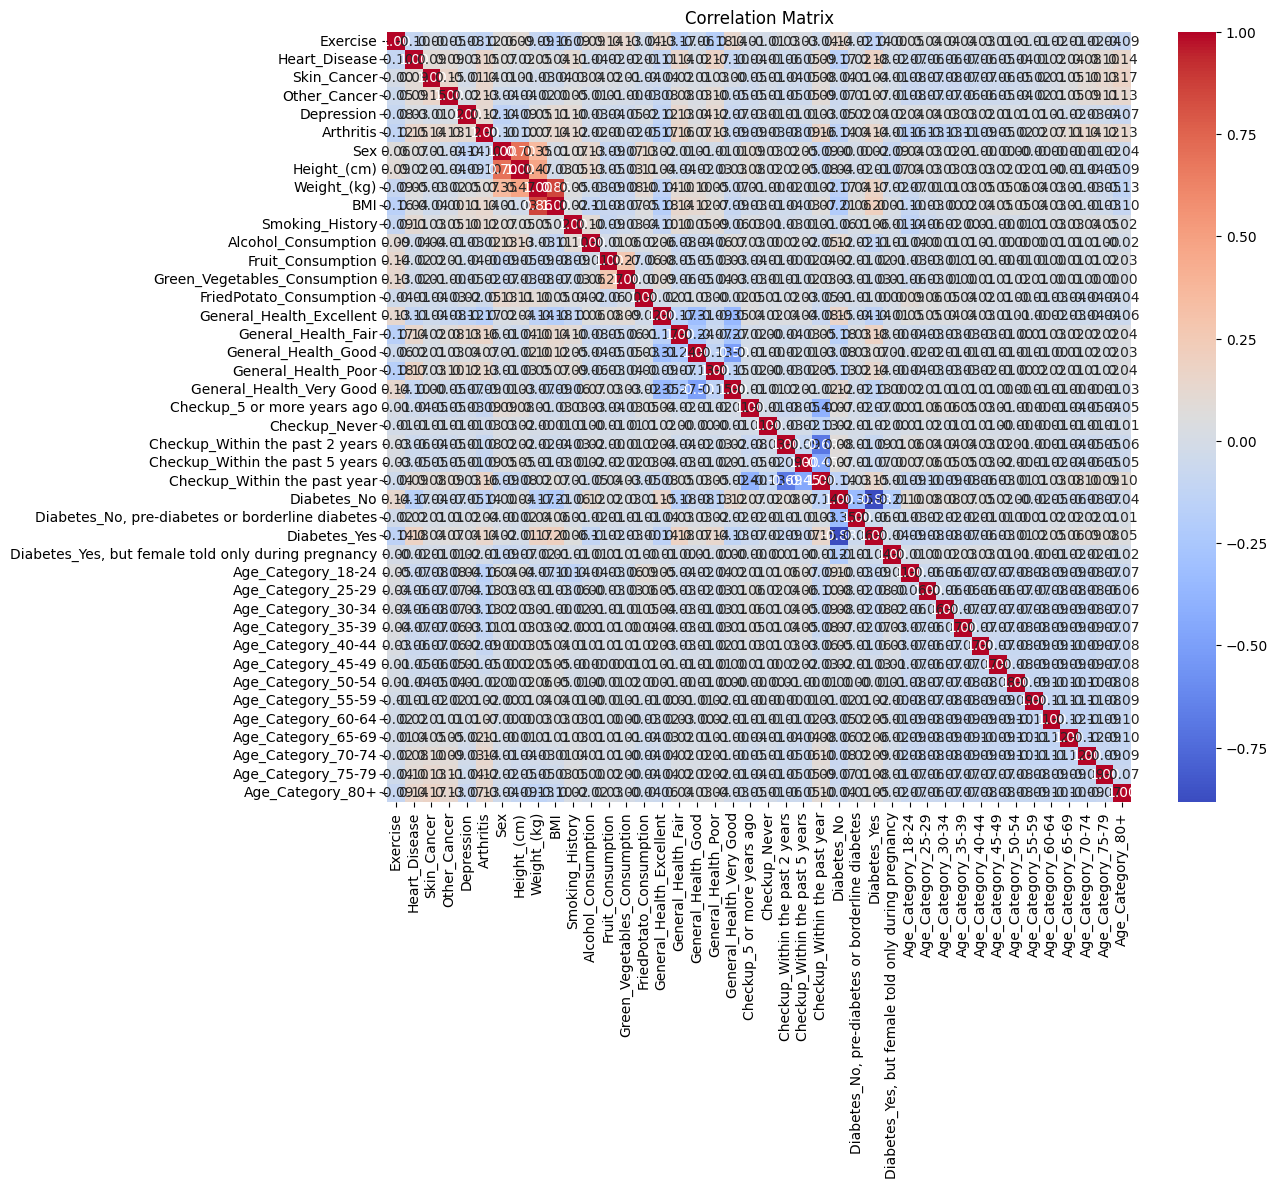

In [33]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X_train, y_train)
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F Score': anova_selector.scores_
}).sort_values(by='ANOVA F Score', ascending=False)

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
rfe_selector = RFE(estimator=model, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)
rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_selector.ranking_
}).sort_values(by='Ranking', ascending=True)
print("RFE Feature Rankings:\n", rfe_features)

RFE Feature Rankings:
                                               Feature  Ranking
14                           General_Health_Excellent        1
30                                 Age_Category_30-34        1
29                                 Age_Category_25-29        1
28                                 Age_Category_18-24        1
31                                 Age_Category_35-39        1
16                                General_Health_Good        1
18                           General_Health_Very Good        1
32                                 Age_Category_40-44        1
39                                 Age_Category_75-79        1
40                                   Age_Category_80+        1
5                                                 Sex        2
38                                 Age_Category_70-74        3
17                                General_Health_Poor        4
37                                 Age_Category_65-69        5
36                              

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Feature Importances:
                                               Feature  Importance
8                                                 BMI    0.139435
7                                         Weight_(kg)    0.124084
6                                         Height_(cm)    0.094653
12                       Green_Vegetables_Consumption    0.093143
11                                  Fruit_Consumption    0.090705
13                            FriedPotato_Consumption    0.088052
10                                Alcohol_Consumption    0.059452
17                                General_Health_Poor    0.019639
0                                            Exercise    0.019531
3                                          Depression    0.018927
4                                           Arthritis    0.018379
40                                   Age_Category_80+    0.017152
9                                     Smoking_History    0.016551
2                                        Other_Cancer 

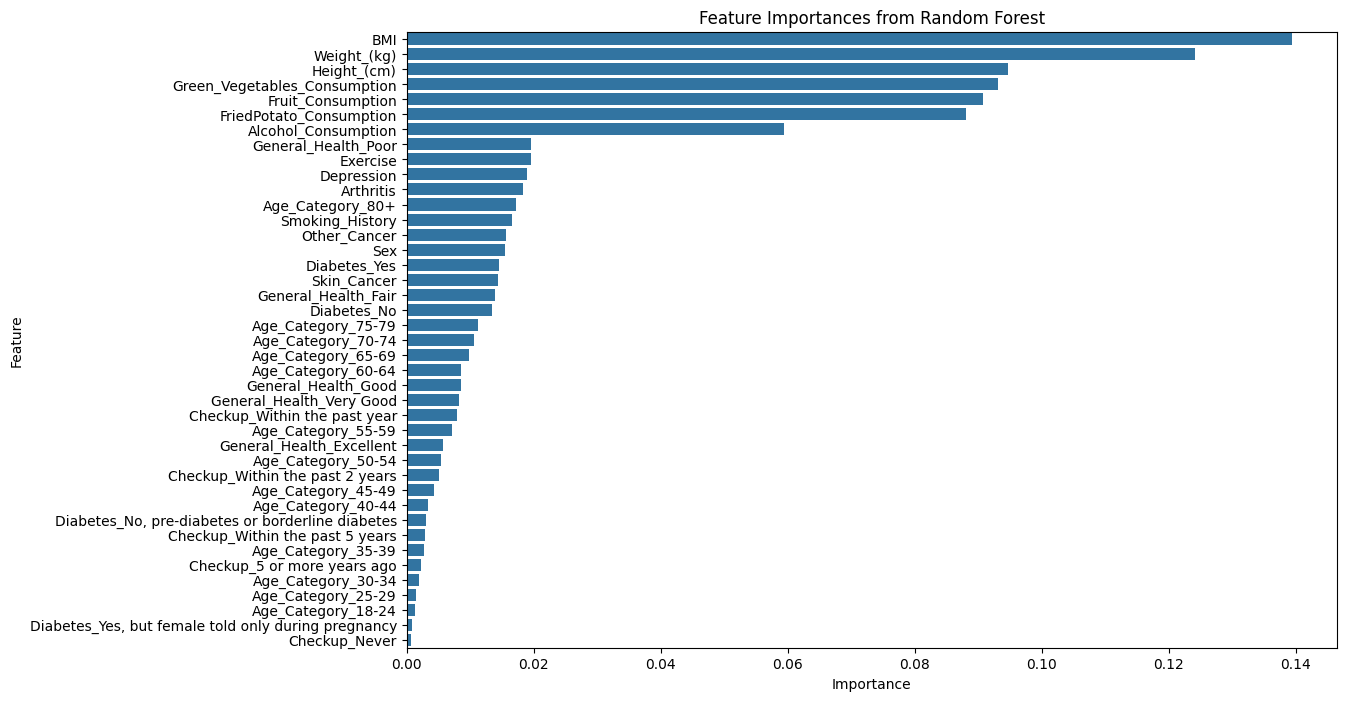

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

In [38]:
selected_features = feature_importances.head(10)['Feature'].tolist()
X_final = data[selected_features]

# Save the final feature set for modeling
X_final.to_csv('final_features_dataset.csv', index=False)

print("Selected features saved.")

Selected features saved.


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [40]:
data = pd.read_csv('final_features_dataset.csv')


In [41]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    # 'SVM': SVC(kernel='linear', probability=True)
}

Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9188
Precision: 0.5169
Recall: 0.0648
F1 Score: 0.1152
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     85101
           1       0.52      0.06      0.12      7556

    accuracy                           0.92     92657
   macro avg       0.72      0.53      0.54     92657
weighted avg       0.89      0.92      0.89     92657

Confusion Matrix:


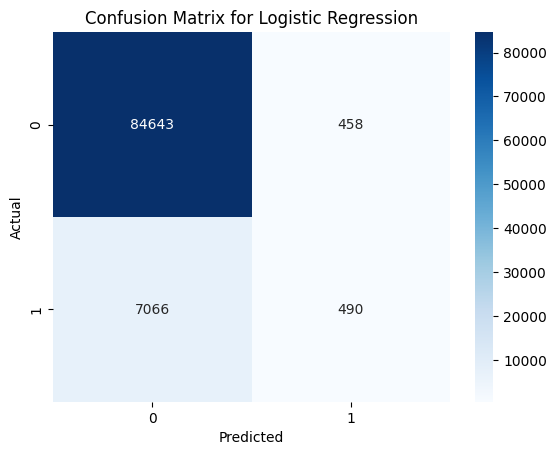



Training Random Forest...
Model: Random Forest
Accuracy: 0.9177
Precision: 0.4528
Recall: 0.0445
F1 Score: 0.0810
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.45      0.04      0.08      7556

    accuracy                           0.92     92657
   macro avg       0.69      0.52      0.52     92657
weighted avg       0.88      0.92      0.89     92657

Confusion Matrix:


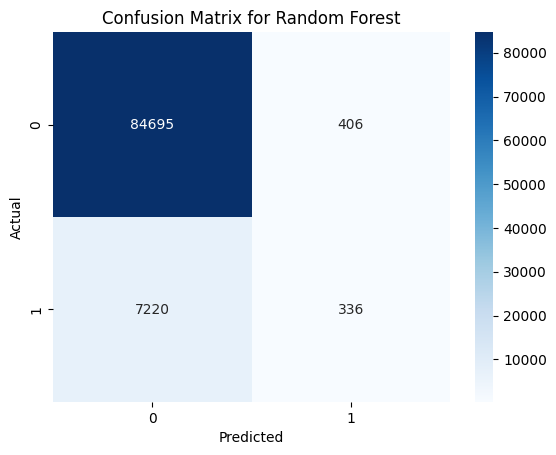



Training Gradient Boosting...
Model: Gradient Boosting
Accuracy: 0.9187
Precision: 0.5125
Recall: 0.0515
F1 Score: 0.0936
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85101
           1       0.51      0.05      0.09      7556

    accuracy                           0.92     92657
   macro avg       0.72      0.52      0.53     92657
weighted avg       0.89      0.92      0.89     92657

Confusion Matrix:


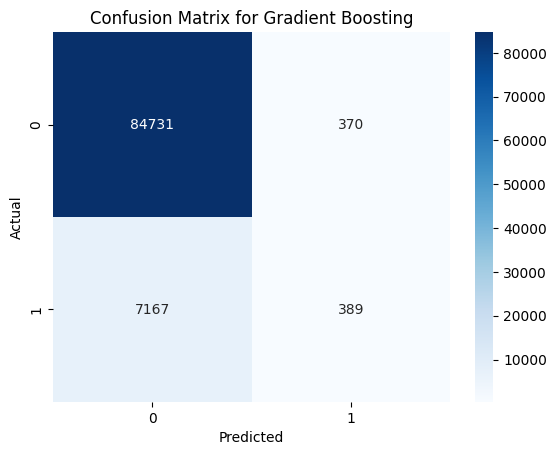

In [42]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n" + "="*60 + "\n")


In [44]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metric
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
 
    model_results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    results.append(model_results)
    
results_df = pd.DataFrame(results)


In [45]:
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.918797   0.516878  0.064849  0.115240
1        Random Forest  0.917696   0.452830  0.044468  0.080983
2    Gradient Boosting  0.918657   0.512516  0.051482  0.093566


In [52]:
y_prob_lr = models['Logistic Regression'].predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [53]:
y_prob_rf = models['Random Forest'].predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [54]:
y_prob_gb = models['Gradient Boosting'].predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)


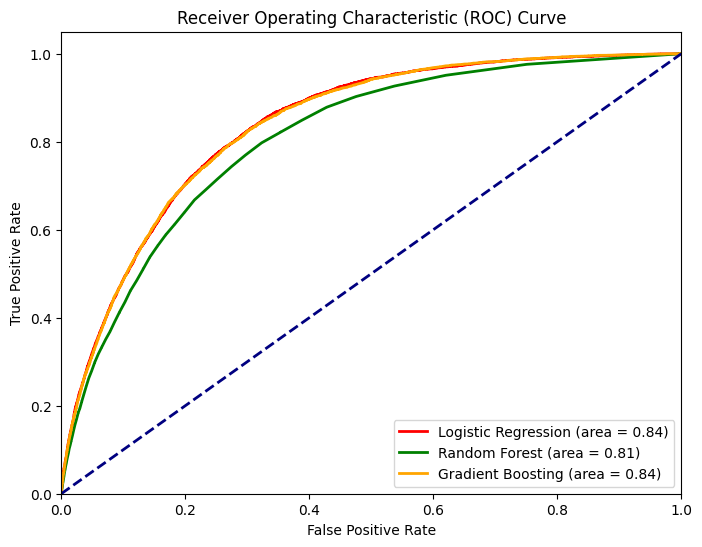

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label='Gradient Boosting (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()